In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



from matplotlib import cm as cm
import seaborn as sns
sns.set(style="darkgrid")

from pylab import rcParams
import scipy
from scipy.stats import spearmanr

%matplotlib inline
plt.style.use('seaborn')

In [13]:
dataset = pd.read_csv('../data/DataForML.csv').drop(['Unnamed: 0'],axis=1)

In [34]:
# # Importing the dataset
# dataset = pd.read_csv('data.csv')
# dataset.diagnosis = [1 if each == "M" else 0 for each in dataset.diagnosis]
# y = dataset.diagnosis.values
# # pd.DataFrame(dataset).fillna(0)
# dataset.drop(["id"], axis=1, inplace=True)

In [15]:
y = dataset.died.values
X_data = dataset.drop(['died'], axis=1)

In [36]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# x_data_copy = x_data.copy()
# XTransformed = imputer.fit_transform(x_data_copy)
# X = pd.DataFrame(XTransformed, columns= x_data_copy.columns)

In [38]:
# from sklearn import preprocessing
# X = X_data.values
# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

In [39]:
# numerics = pd.DataFrame(X, columns=dataset.columns)

In [40]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Encoding categorical data
# Encoding the Independent Variable
""""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()"""
# Encoding the Dependent Variable
""""labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)"""

'"labelencoder_y = LabelEncoder()\ny = labelencoder_y.fit_transform(y)'

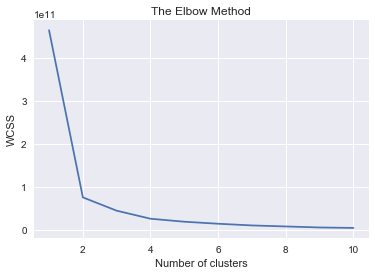

In [16]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)

In [18]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_data)
X = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2']).values

In [48]:
# from sklearn.manifold import TSNE
# pca = TSNE(n_components=2)
# principalComponents = pca.fit_transform(X)
# X = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2']).values

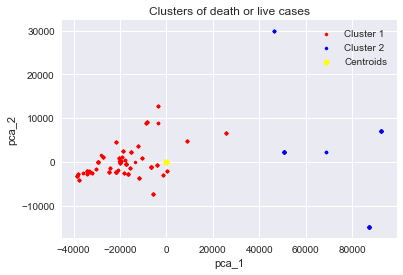

In [26]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of death or live cases')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.legend()
plt.show()

In [27]:
dataset['Target'] = pd.DataFrame(y_kmeans)

In [ ]:
pl.figure('3 Cluster K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('Dividend Yield')

pl.ylabel('Returns')

pl.title('3 Cluster K-Means')

pl.show()


In [54]:
# dataset[['diagnosis','Target']]

In [24]:
# data.groupby('Target')['avg_teacher_service_years','boys_latrine_norm','boys_present','chalk_board_brok','chalk_board_good_norm','counsellors_female','Avg_Result_norm'].mean().sort_values(by=['Avg_Result_norm'])

In [56]:
results = dataset.groupby('Target')['compactness_worst', 'concavity_worst'].mean()  

In [57]:
results

,compactness_worst,concavity_worst
Target,,
0,0.180597,0.164541
1,0.402380,0.488622


In [59]:
#correlation matrix before dropping the variables
# x1 = results.values
# correlation_matrix = np.corrcoef(x1.T)

# fig = plt.figure(figsize=(25,25), dpi=200)
# ax = fig.add_subplot(111)
# cmap = cm.get_cmap('jet', 10)
# cax = ax.matshow(correlation_matrix,cmap=cmap, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(results.columns),1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(results.columns,rotation='vertical',fontsize=20)
# ax.set_yticklabels(results.columns,fontsize=20)
# plt.show()